## Кооперативная теория игр
#### Определения
* Коалиция - это любое подмножество множества игрков. 
* Характеристическая функция $v$ - это функция, которая определяет соотвествие между коалициями и общей наградой за обединение в коалиции.
* $(x_1, x_2, ..., x_n) $ - вектор выигрышей в кооперативной игре.

#### Основная задача
Найти вектор выигрышей(или множество допустимых векторов) в данной игре, исходя из органичений на поведение игроков и ограничений игры, либо доказать что такой вектор не существует.
#### Пример. Джаз-бенд
Вася и Петя играют в переходе. Если они играют вместе, то зарабатывают 200 рублей в час - $v(\{\text{Вася, Петя} \}) = 200$. Если играет один Вася, то $v(\{\text{Вася} \}) = 80$, а один Петя - $v(\{\text{Петя} \}) = 90$. Как поделить выигрыши в этой игре?
#### Концепция - Ядро.
* Эффективность - мы распределяем весь выигрыш большой коалиции.
* Рациональность - нет коалиции, которая бы хотела что-то сделать в отдельности.  
Для игры выше получим систему: 
\begin{equation}
    \begin{cases}
      x_1 \ge 80\\
      x_2 \ge 90\\
      x_1 + x_2 = 200
    \end{cases}\,.
\end{equation}
Множество решений: $(y, 200 - y)$, где $\forall y: y\ge 80 \land y \le 200$

#### Концепция - Вектор Шепли
* Эффективность - мы распределяем весь выигрыш большой коалиции.
* Симметричность - игроки, вносящие одинаковый вклад, получают одинаковый выигрыш.
* Бесполезные игроки ничего не получают
* Функция выигрыша -- линейна.

Функция дележа(выигрыша), которая обладает такими свойствами -- дележ Шепли или вектор Шепли.

$$\phi_i(v) = \phi_i = \sum_{S \subseteq N \setminus\{i\}} \frac{|S| ! (M-| S| - 1)!}{M!}(v(S\cup \{i\})-v(S))$$


|   | Вася| Петя |
|---|---|---|
|Вася, Петя|80|120|
|Петя, Вася|100|110  |90|
$$ v = (95, 105)$$

[<img src="https://miro.medium.com/max/3000/1*595rowSGP8a6nOMOrmovcw.png">](https://rysullivan.medium.com/is-uber-fare-splitting-fair-b7760c5925e6)


|   | A | B | C |
|---|---|---|---|
|ABC|100|100|100|
|ACB|100|0  |200|
|BAC|0  |200|100|
|BCA|0  |200|100|
|CAB|0  |  0|300|
|CBA|0  |  0|300|

$$ v = (\frac{200}{6}, \frac{500}{6}, \frac{1100}{6})$$

Игры, в которых пересекаются ядро и вектор Шепли, входят в класс супермодулярных кооперативных игр.  
Другие концепции решения кооперативных игр:  
* K-ядро  
* Нуклеолус  
* и т.д.  

[Задача о дележе. Игра "Аэропорт"](https://en.wikipedia.org/wiki/Airport_problem)  
[Вектор Шепли. Савватеев](https://www.youtube.com/watch?v=yqSBV_dzyRs)

### Значения Шепли и машинное обучение.

In [1]:
from IPython.display import Image

import shap
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeRegressor
import plotly_express as px
X, y = shap.datasets.boston()
X, y = X.iloc[:, -4:], y
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [2]:
X.head()

,TAX,PTRATIO,B,LSTAT
0,296.0,15.3,396.90,4.98
1,242.0,17.8,396.90,9.14
2,242.0,17.8,392.83,4.03
3,222.0,18.7,394.63,2.94
4,222.0,18.7,396.90,5.33


In [3]:
explainer = shap.Explainer(model, X)
shap_values = explainer(X)

In [4]:
import numpy as np

In [5]:
print(f"f(x) {model.predict(X.head(1))[0]}")
print(f"E[f(x)] {np.mean(model.predict(X))}")

f(x) 32.50002302941751
E[f(x)] 22.532806324110716


In [6]:
#Здесь что-то не совсем точно равное E[f(x)], так как в искомой библиотеке используется сэмлирование

In [7]:
from itertools import permutations

Еще раз вспомним функцию для значений Шепли:
\begin{equation}
\phi_i(v) = \phi_i = \sum_{S \subseteq N \setminus\{i\}} \frac{|S| ! (M-| S| - 1)!}{M!}(v(S\cup \{i\})-v(S))
\end{equation}

$v(S) = \mbox{E}[f(\boldsymbol{x})|\boldsymbol{x}_S]$ - теперь характеристическая функция - это математическое ожидание, при некотором фиксированном модмножестве признаков $\boldsymbol{x}_S$( та самая коалиция ) - SHAP (SHapley Additive exPlanation) значение.  
Зафиксируем вектор $\boldsymbol{x}_S^*$ для данного подмножества:
\begin{equation}
E[f(\boldsymbol{x})|\boldsymbol{x}_s=\boldsymbol{x}_S^*] = E[f(\boldsymbol{x}_{\bar{S}},\boldsymbol{x}_S)|\boldsymbol{x}_S=\boldsymbol{x}_S^*] = 
\int f(\boldsymbol{x}_{\bar{S}},\boldsymbol{x}_S^*)\,p(\boldsymbol{x}_{\bar{S}}|\boldsymbol{x}_S=\boldsymbol{x}_S^*)d\boldsymbol{x}_{\bar{S}},
\end{equation}
Этот интеграл было предложено оценивать с помощью Монте-Карло оценки, так как вероятностного  распределения под интегралом мы не знаем и преполагаем независимость признаков(очень строгое допущение):

\begin{equation}
v_{\text{KerSHAP}}(S) = \frac{1}{K}\sum_{k=1}^K f(\boldsymbol{x}_{\bar{S}}^{k},\boldsymbol{x}_S^*)
\end{equation}

In [8]:
def shap_value(
    model, x_feature,
    X_dataset, Y_dataset,
    sample_size=100
):
    """Матрица для расчета значений Шепли.
    Параметры
    ---------
    model: 
        модель с API sklearn.
    x_feature: np.ndarray
        вектор признаков.
    X_dataset: pd.DataFrame
        данные с признаками.
    Y_dataset: np.ndarray
        одномерный вектор целевых значений.
    sample_size: int
        размер выборки из X_dataset для апроксимации характеристической функции.
    Возвращаемые значения:
    ----------------------
    shapley_matrix: np.ndarray
    f_matrix: np.ndarray
    """
    n_features = np.arange(len(x_feature))
    # все перестановки признаков.
    permuts = tuple(permutations(n_features))
    #  матрица количество перестановок на количество признаков -- отсылка к табличкам выше.
    shapley_matrix = np.empty((len(permuts), len(n_features)))
    # вспомогательная матрица.
    f_matrix = np.empty((len(permuts), len(n_features)))
    for idx_permut, permut in enumerate(permuts):
        for idx, feature_id in enumerate(permut):
            # предложение из статьи для монте-карло оценивания функции v(S∪{i}), добавляем i-признак к коалиции. (3)
            sample = X_dataset.sample(sample_size).values
            # заполняем все значениями признаков которые вошли в коалицию, признаки не вошедшие в коалицию оставляем без изменений. (3)
            for idxx in permut[:idx+1]:
                sample[:, idxx] = x_feature[idxx]
            # (2)
            f_x = np.mean(model.predict(sample))
            # когда коалиция пуста - нет признаков - предсказание - это среднее по всей совокупности
            last_value = np.mean(Y_dataset) if idx == 0 else f_matrix[idx_permut, permut[idx-1]]
            # заполняем таблицу с дележами. (1)
            shapley_matrix[idx_permut, feature_id] = f_x - last_value
            f_matrix[idx_permut, feature_id] = f_x
    return shapley_matrix, f_matrix
        

In [9]:
def plot(model, x_features, X_dataset, Y_dataset, sample_size_frac=1):
    """Визуализация значений Шепли.
    Параметры
    ---------
    model: 
        модель с API sklearn.
    x_feature: np.ndarray
        вектор признаков.
    X_dataset: pd.DataFrame
        данные с признаками.
    Y_dataset: np.ndarray
        одномерный вектор целевых значений.
    sample_size_frac: float
        Доля для сэмплирования
    Возвращаемые значения:
    """
    sample_size = int(sample_size_frac*len(X_dataset))
    shapley_matrix, f_matrix = shap_value(model, x_features, X_dataset, Y_dataset, sample_size=sample_size)
    args_ids = np.abs(shapley_matrix.mean(axis=0)).argsort()
    print(f"f(x) {model.predict([x_features])[0]}")
    print(f"E[f(x)] {np.mean(model.predict(X_dataset))}")
    print(f"Features: {X_dataset.columns.values[args_ids]}")
    print(f"Features values: {x_features[args_ids]}")
    print(f"Shapley values: {shapley_matrix.mean(axis=0)[args_ids]}")
    fig = px.bar(y=X_dataset.columns.values[args_ids],
        x=shapley_matrix.mean(axis=0)[args_ids],
        color=shapley_matrix.mean(axis=0)[args_ids],
        text=shapley_matrix.mean(axis=0)[args_ids],
        title=f"f(x) {model.predict([x_features])[0]:.2f} \n E[f(x)] {np.mean(model.predict(X_dataset)):.2f}"
    )
    fig.update_traces(texttemplate='%{text:.2f}', textposition='outside')
    return Image(fig.to_image(format="png", width=800, height=300, scale=2))

f(x) 32.50002302941751
E[f(x)] 22.532806324110716
Features: ['TAX' 'B' 'PTRATIO' 'LSTAT']
Features values: [296.   396.9   15.3    4.98]
Shapley values: [-0.17482454  0.27711414  3.68526809  6.17965902]


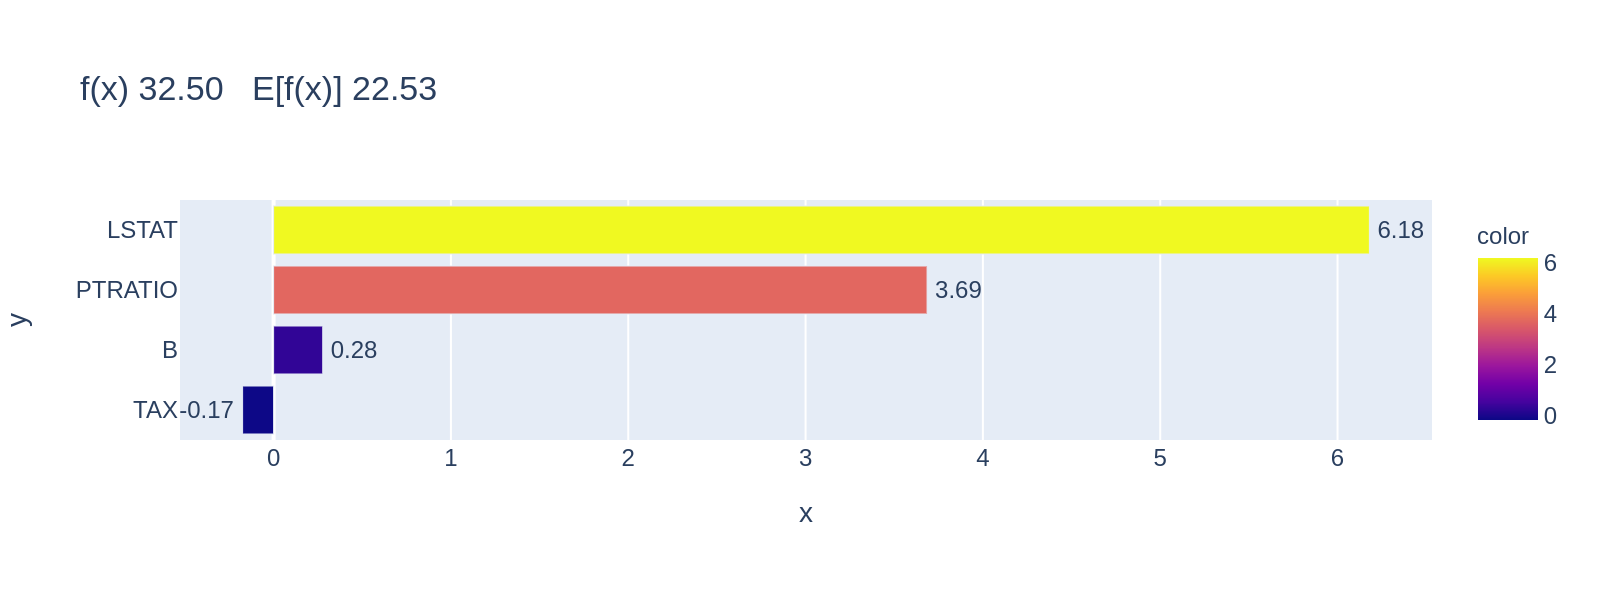

In [10]:
plot(model, X.iloc[0].values, X, y)

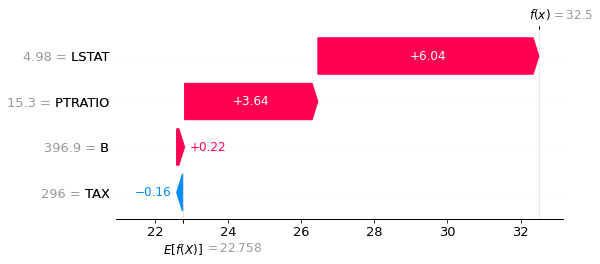

In [11]:
shap.plots.waterfall(shap_values[0])

f(x) 23.83493662727657
E[f(x)] 22.532806324110716
Features: ['TAX' 'B' 'LSTAT' 'PTRATIO']
Features values: [243.   395.56  13.45  16.8 ]
Shapley values: [-0.25737921  0.26788296 -0.64182938  1.93345593]


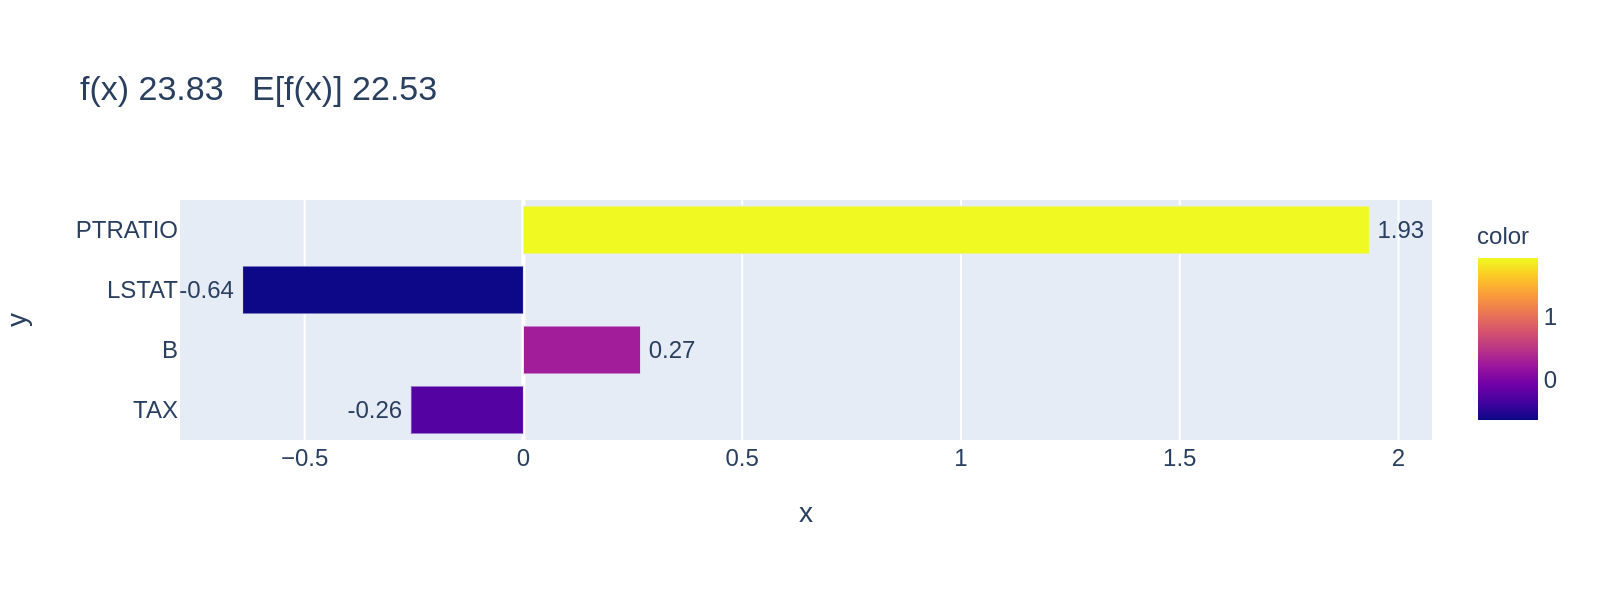

In [12]:
plot(model, X.iloc[50].values, X, y)

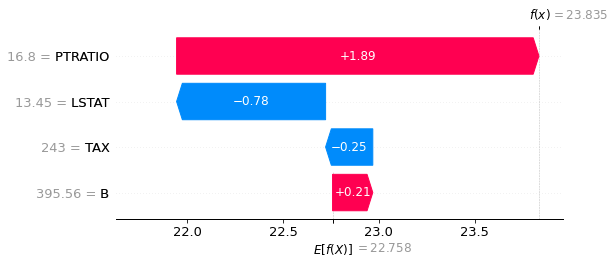

In [13]:
shap.plots.waterfall(shap_values[50])

[Shapr](https://cran.r-project.org/web/packages/shapr/vignettes/understanding_shapr.html)  
[Shap](https://shap.readthedocs.io/en/latest/)  
[S.Lundberg, S.Lee. A Unified Approach to Interpreting Model Predictions](https://papers.nips.cc/paper/2017/file/8a20a8621978632d76c43dfd28b67767-Paper.pdf)